In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image, display

In [5]:
%cd {HOME}
! yolo task = detect mode = predict model = yolov8n.pt conf = 0.25 source = 'https://media.roboflow.com/notebooks/examples/dog.jpeg' save = True

/content
100% 6.23M/6.23M [00:00<00:00, 56.2MB/s]

2024-01-15 14:54:23.393005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 14:54:23.393076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 14:54:23.394851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 14:54:25.578223: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<

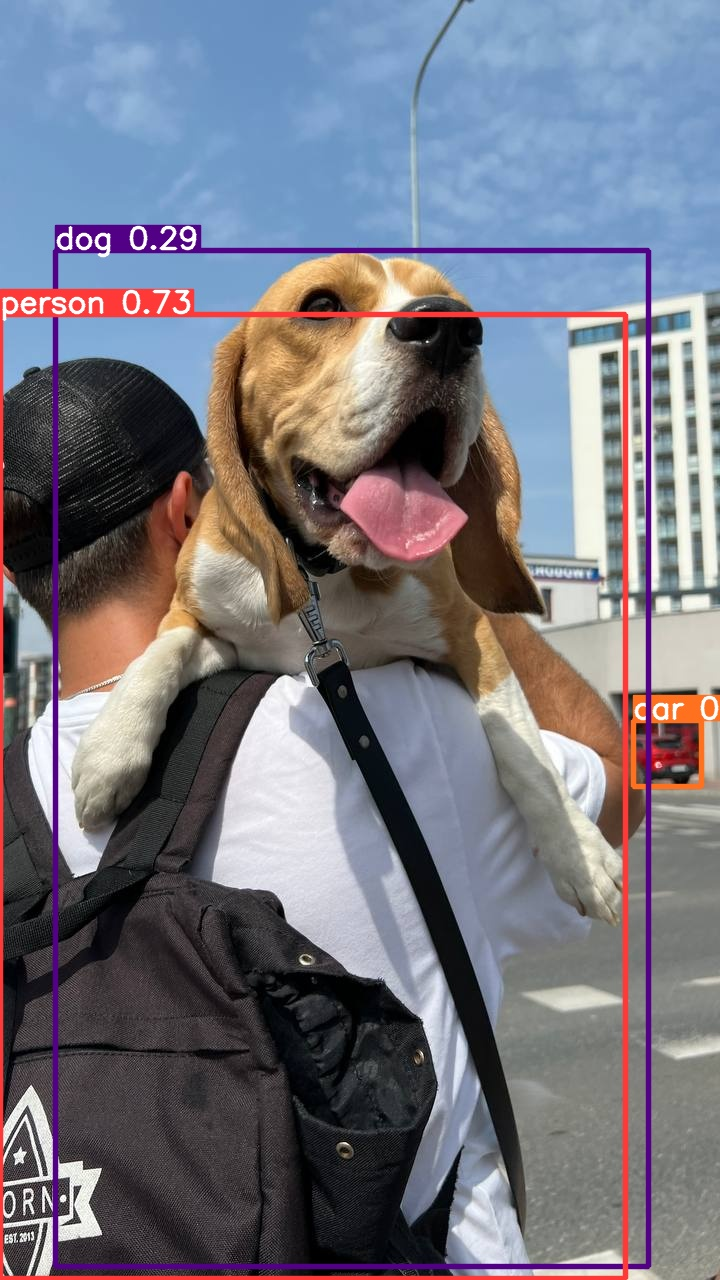

In [6]:
Image(filename = 'runs/detect/predict/dog.jpeg', height=500)

In [7]:
model = YOLO(f"{HOME}/yolov8n.pt")
natijalar = model.predict(source = 'https://media.roboflow.com/notebooks/examples/dog.jpeg')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [8]:
natijalar[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [9]:
natijalar[0].boxes.conf

tensor([0.72713, 0.29066, 0.28455], device='cuda:0')

In [10]:
natijalar[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [11]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [12]:
! pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Bi1h6o9fF3eRp0N8ECHE")
project = rf.workspace("roboflow-100").project("vehicles-q0x2v")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to vehicles-2 in yolov8:: 100%|██████████| 8128/8128 [00:01<00:00, 5060.21it/s]


In [14]:
%cd {HOME}

!yolo task = detect mode = train model = yolov8s.pt data = {dataset.location}/data.yaml epochs = 10 imgsz = 640 plots = True

/content
100% 21.5M/21.5M [00:00<00:00, 158MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/vehicles-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

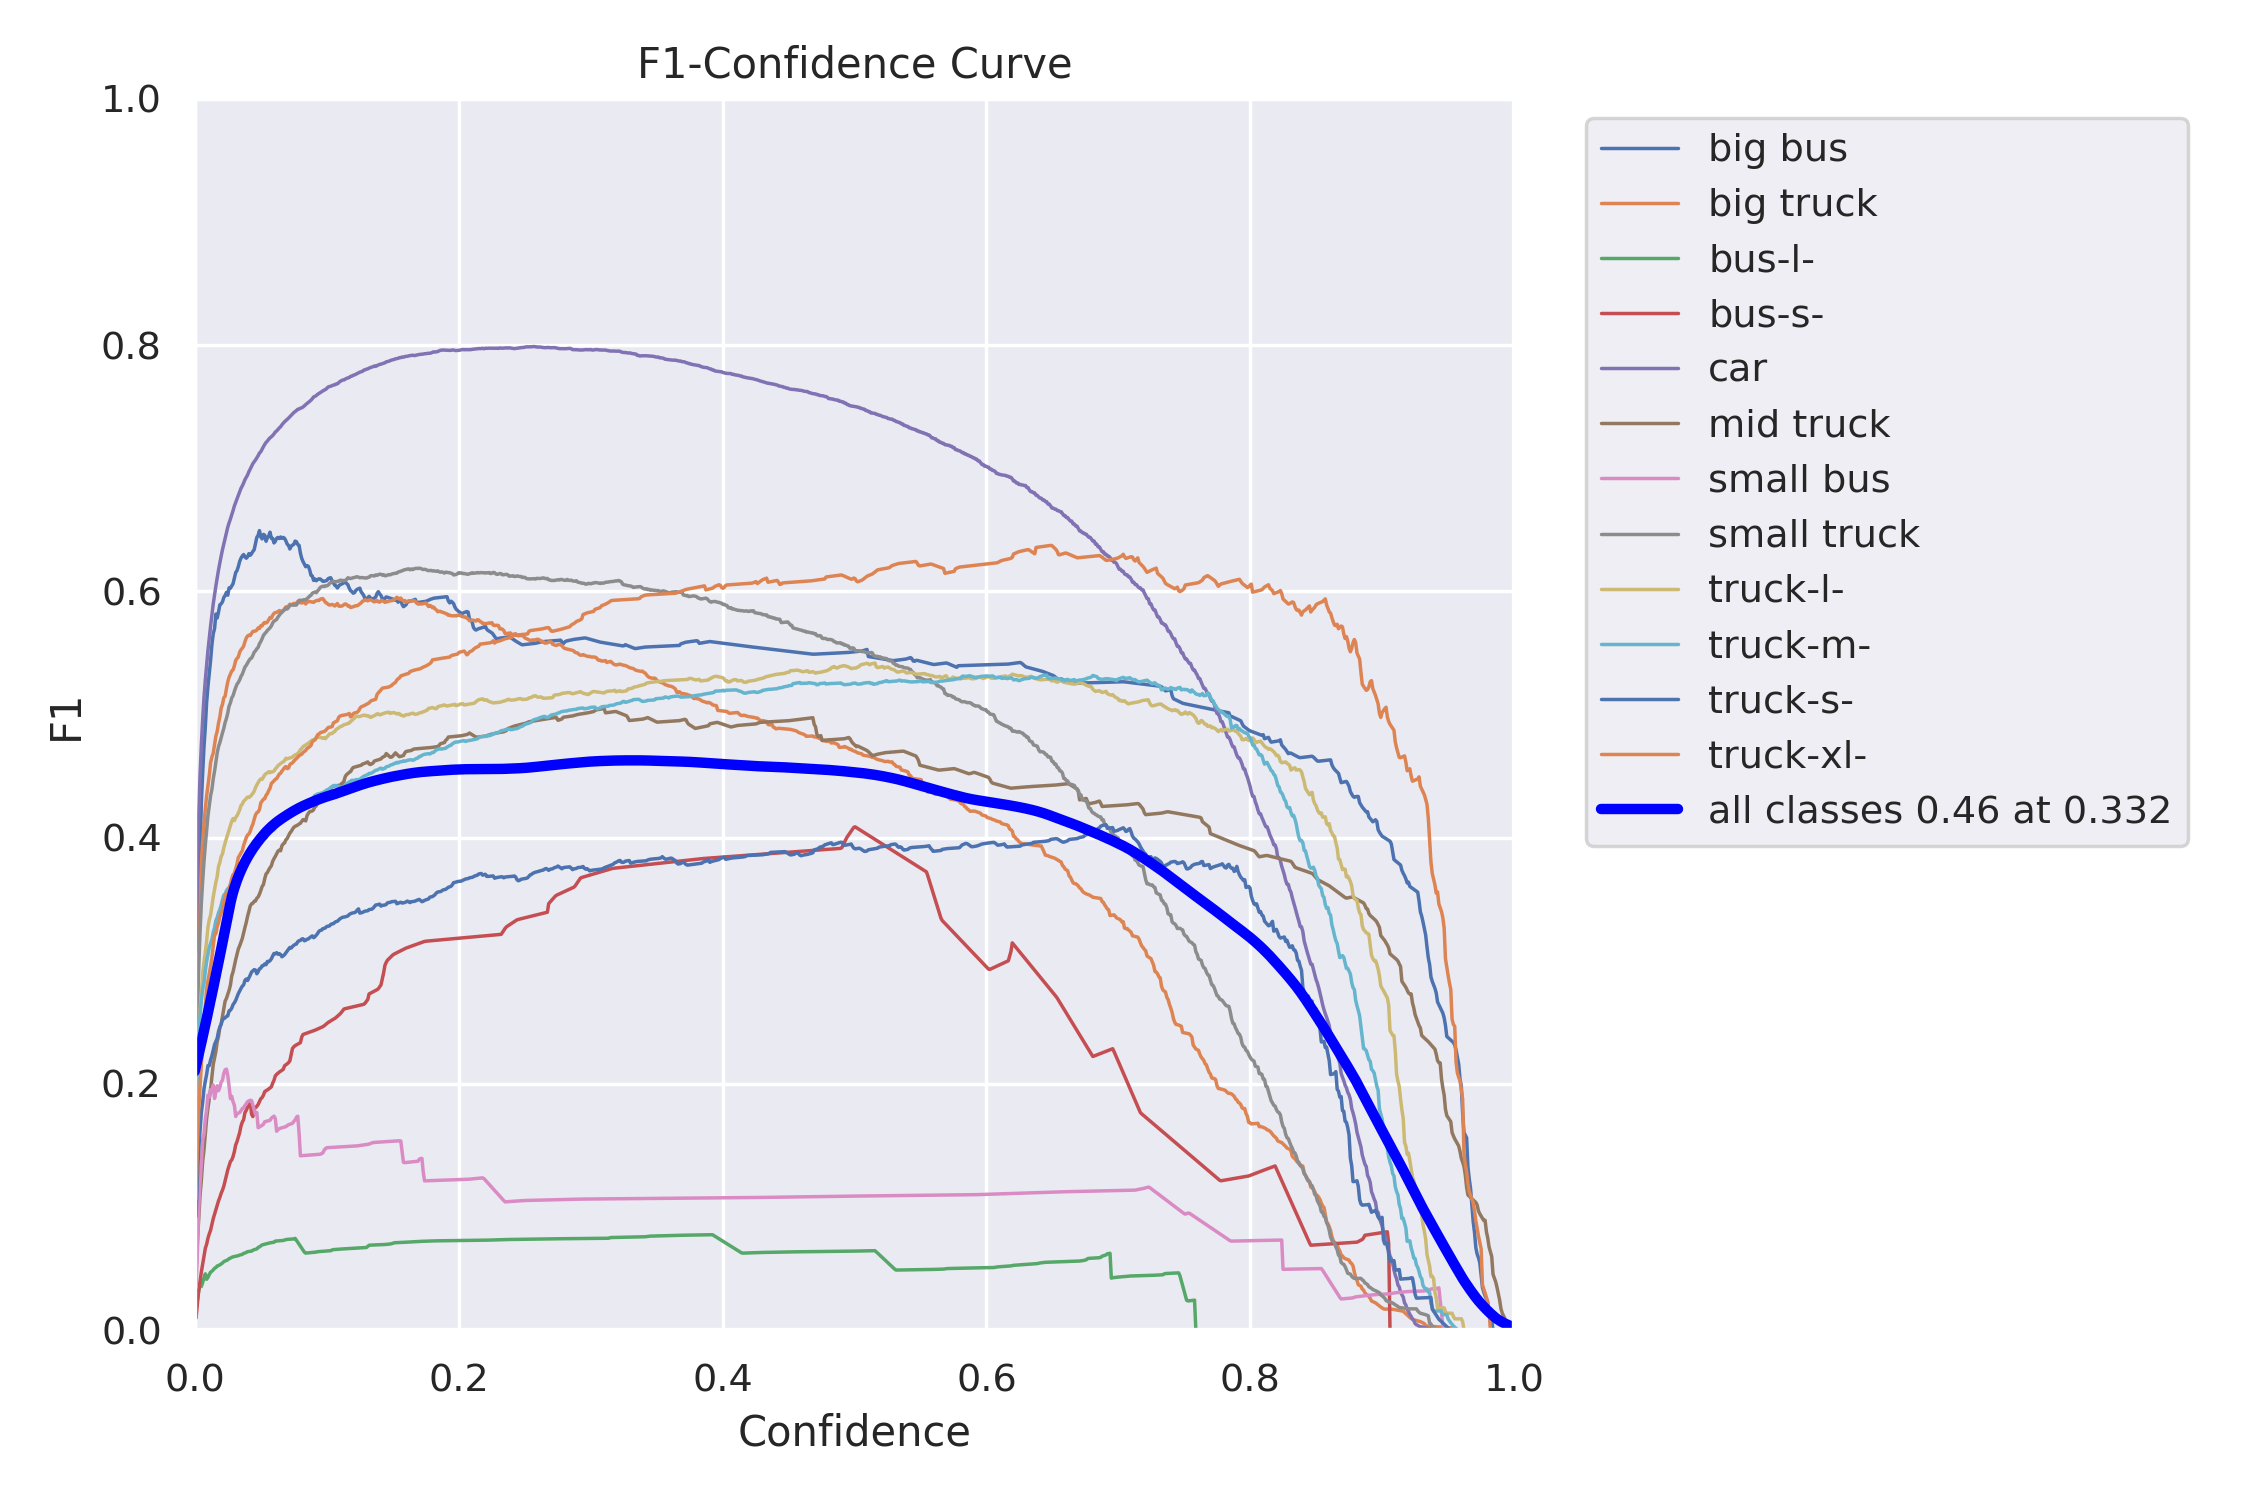

In [16]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

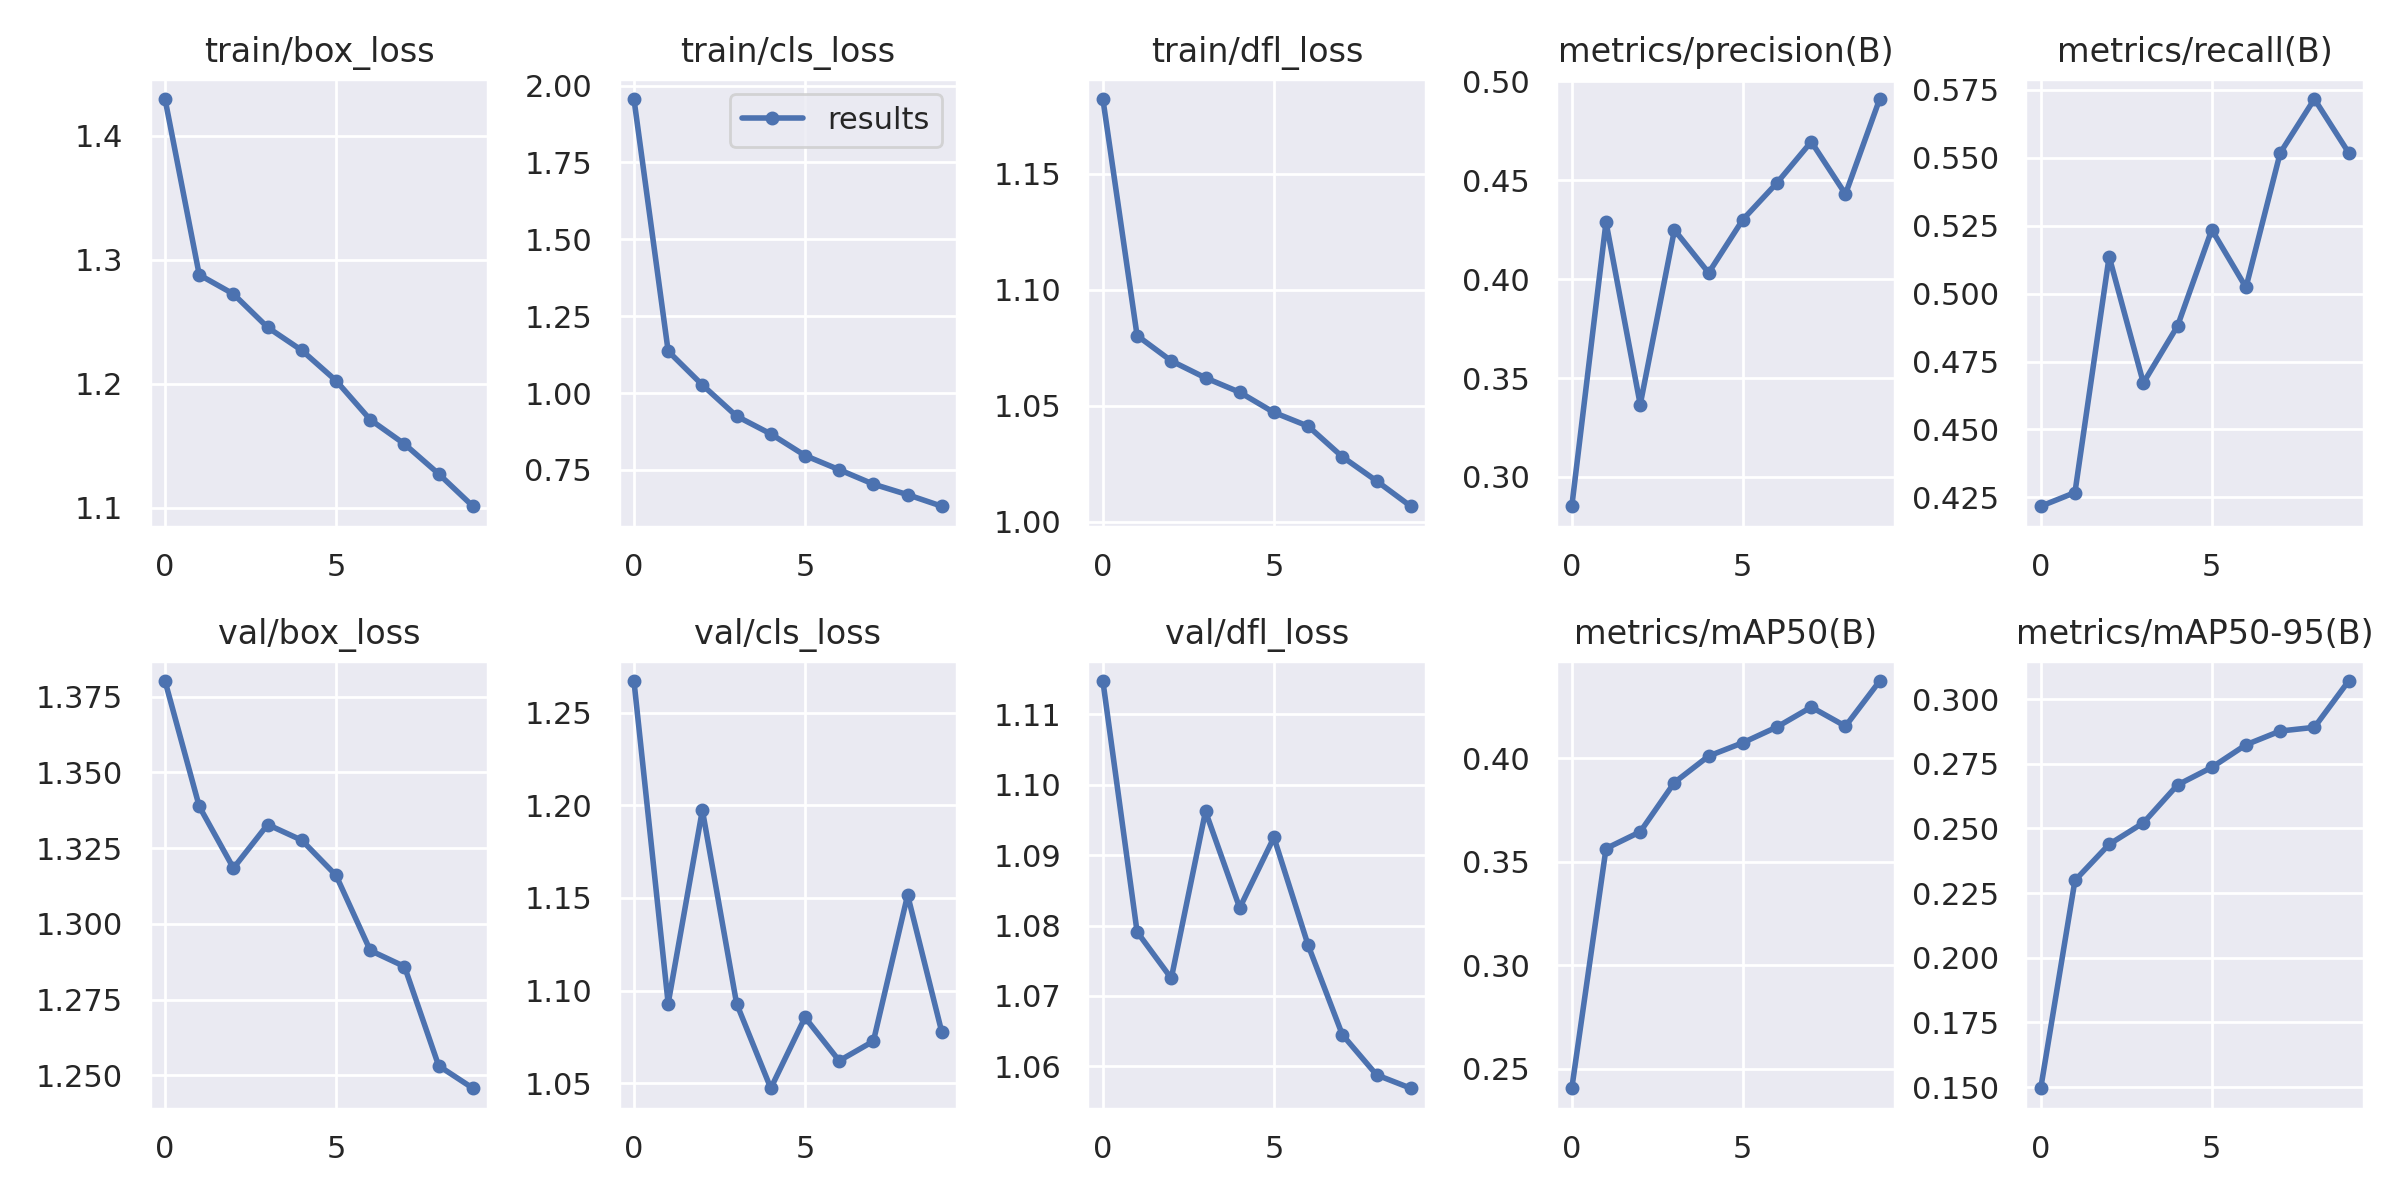

In [18]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

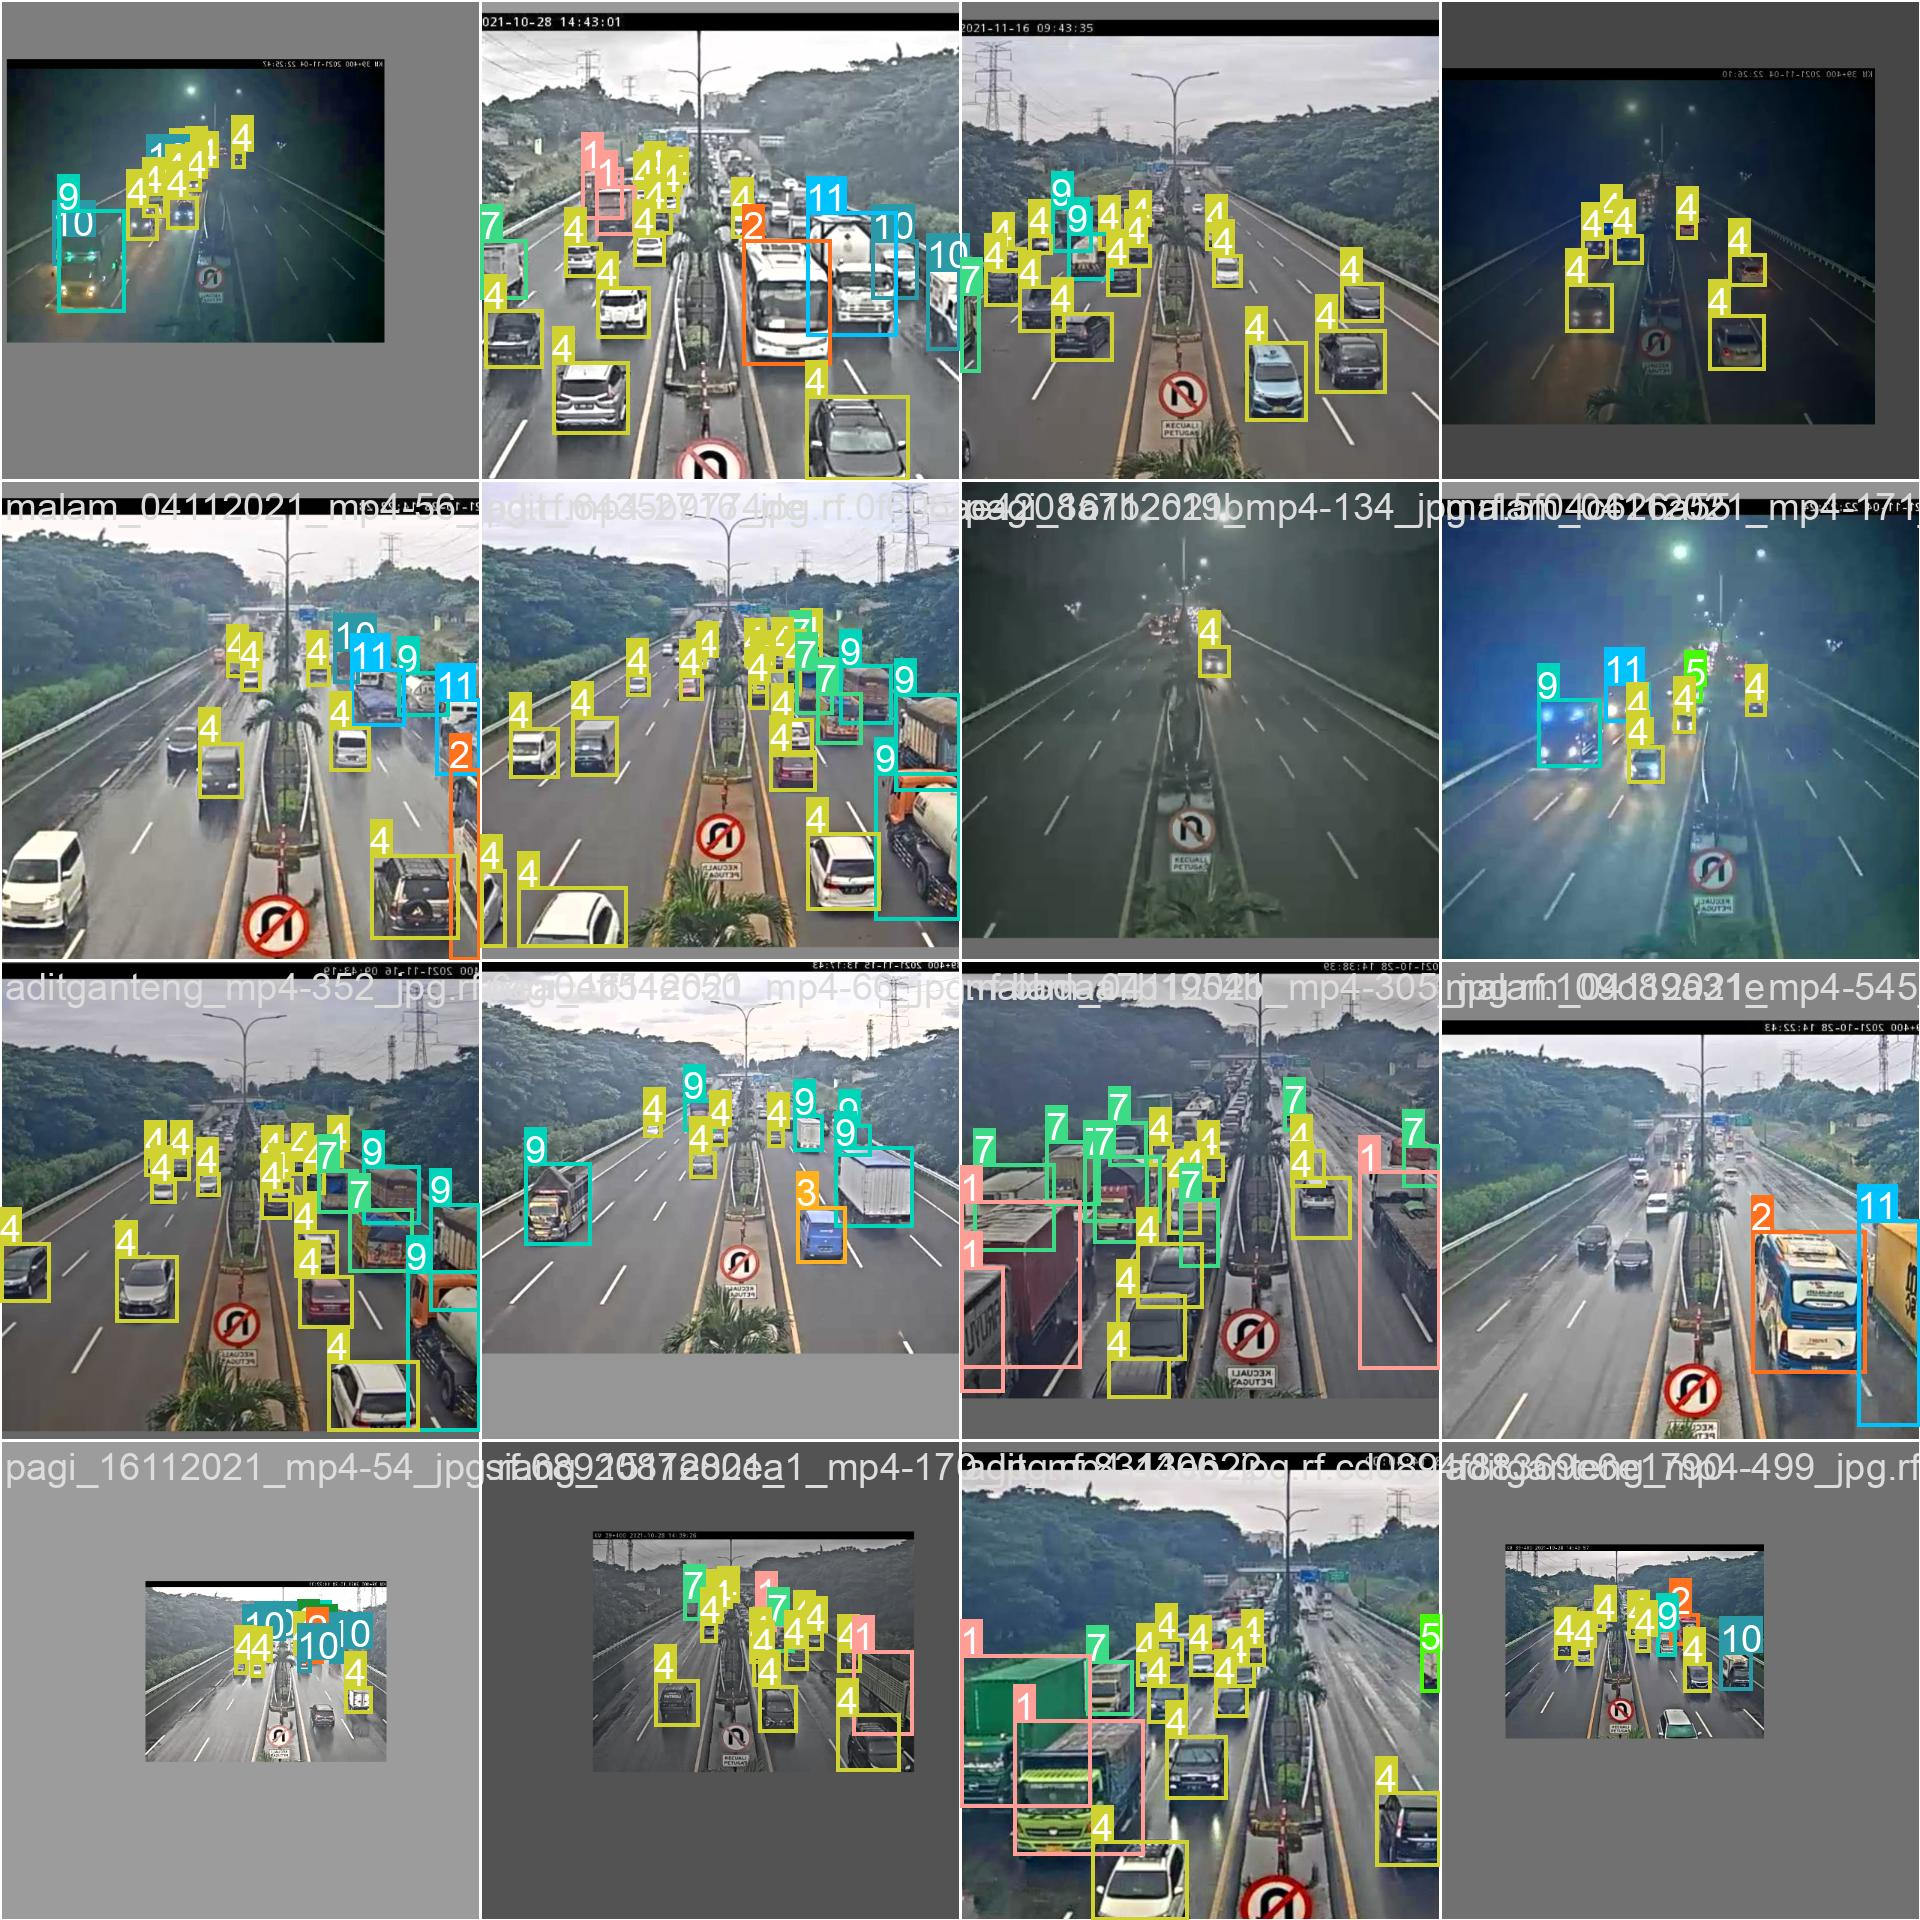

In [20]:
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

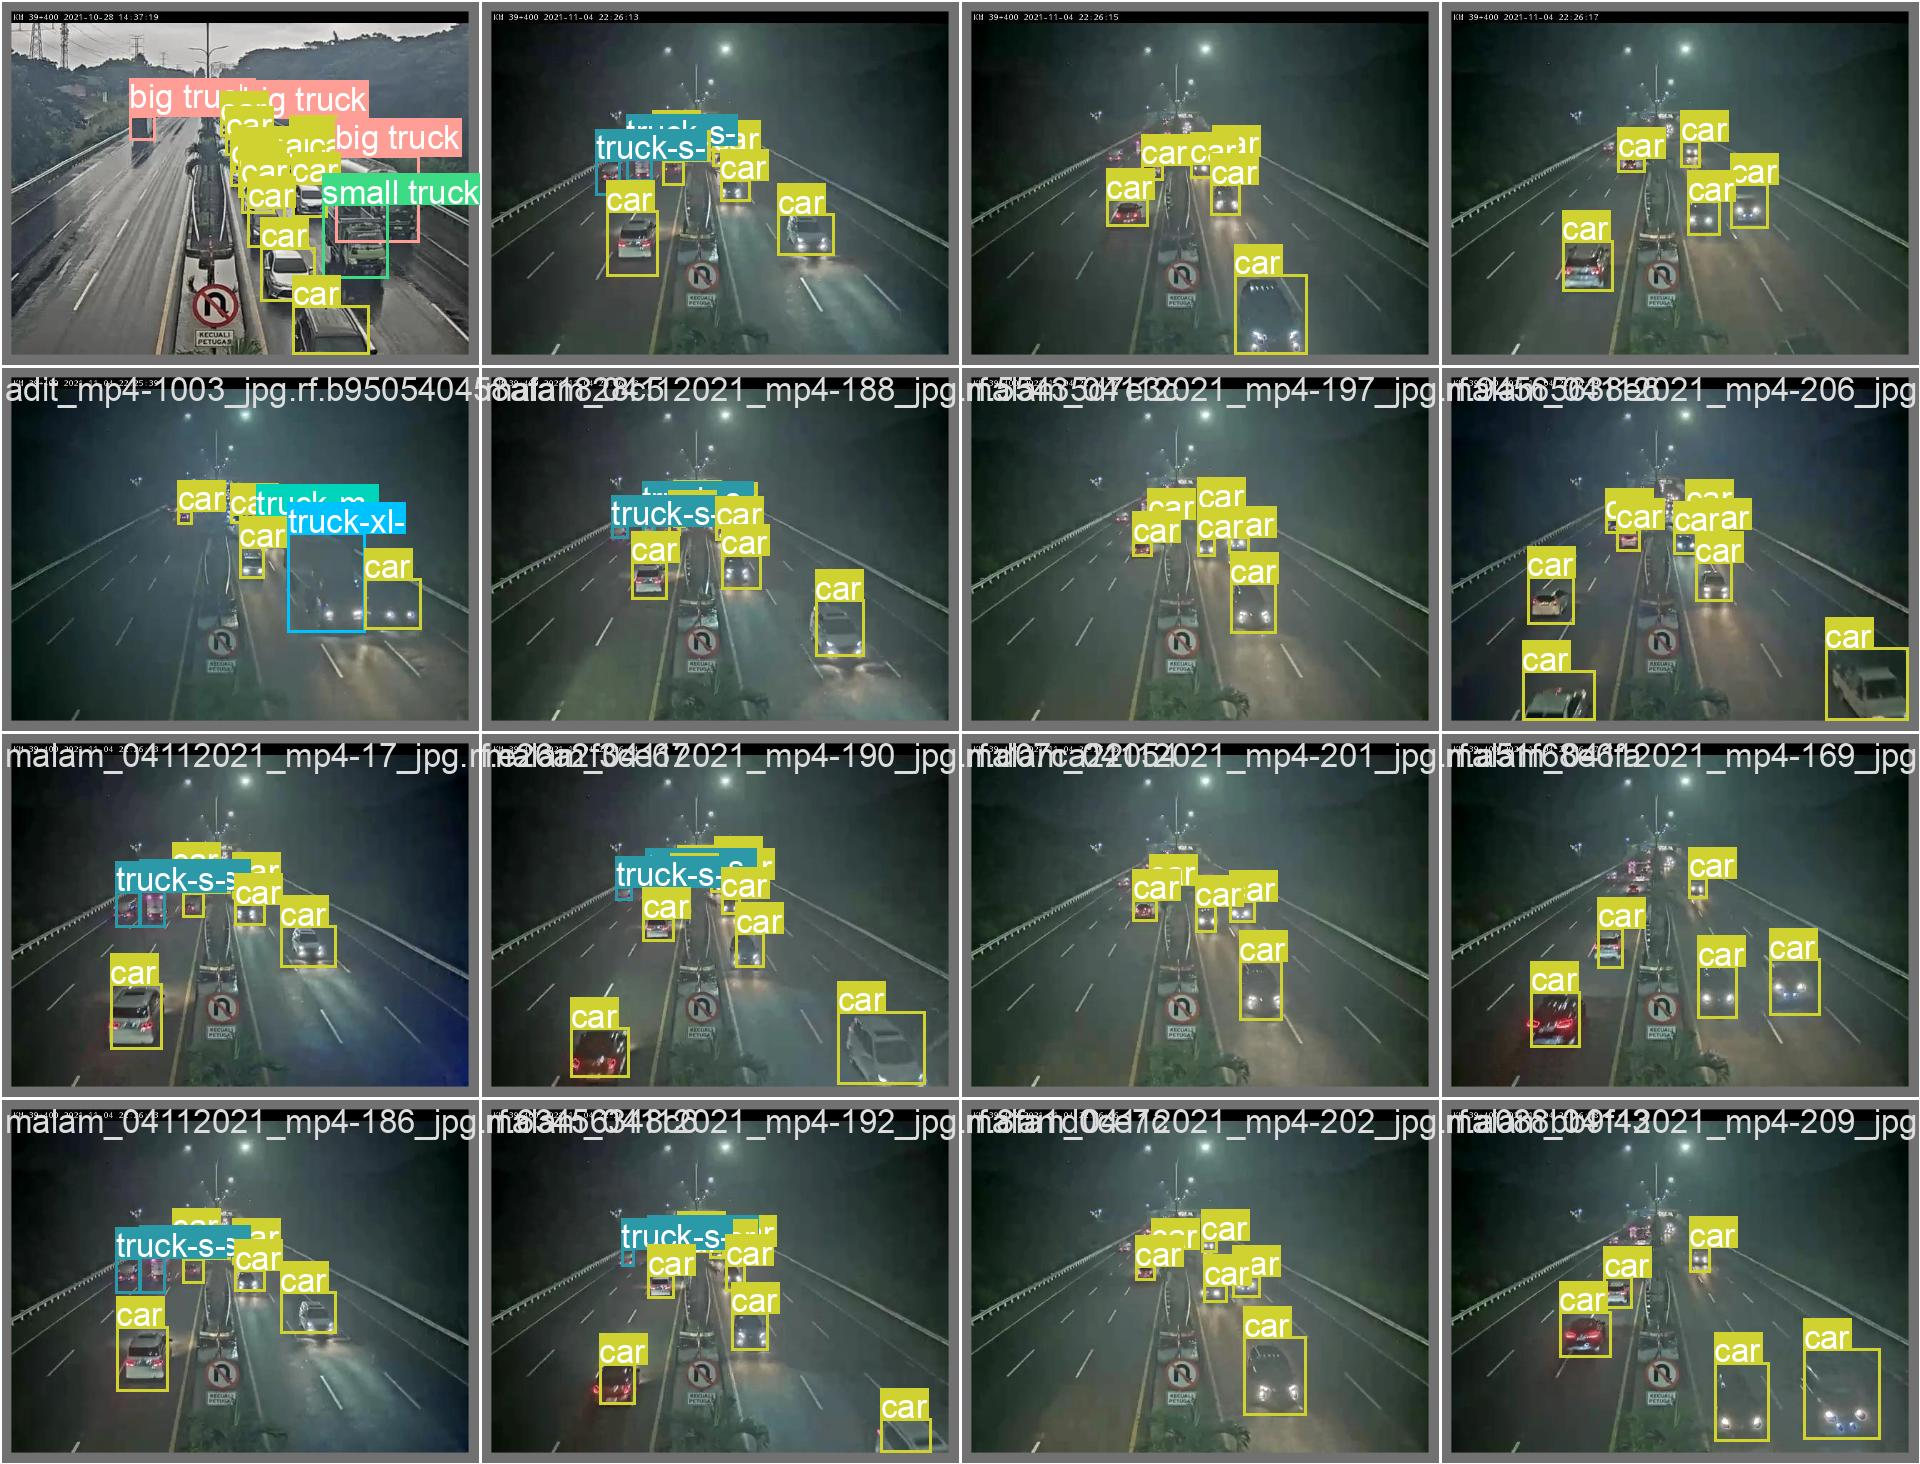

In [21]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=600)

In [30]:
%cd {HOME}
!yolo task = detect mode = predict model = {HOME}/runs/detect/train/weights/best.pt conf = 0.2 source = {dataset.location}/test/images save = True

/content
2024-01-15 15:24:37.708900: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 15:24:37.708946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 15:24:37.710221: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 15:24:38.732774: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/458 /content/d

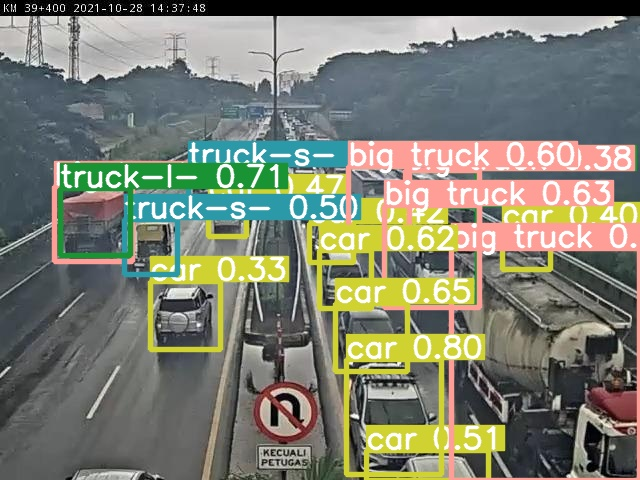

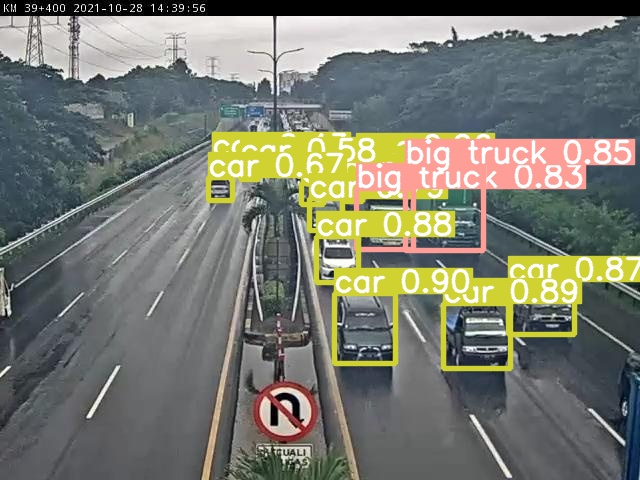

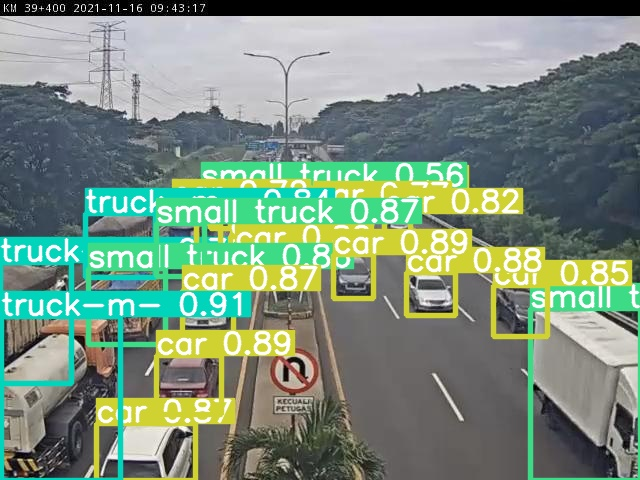

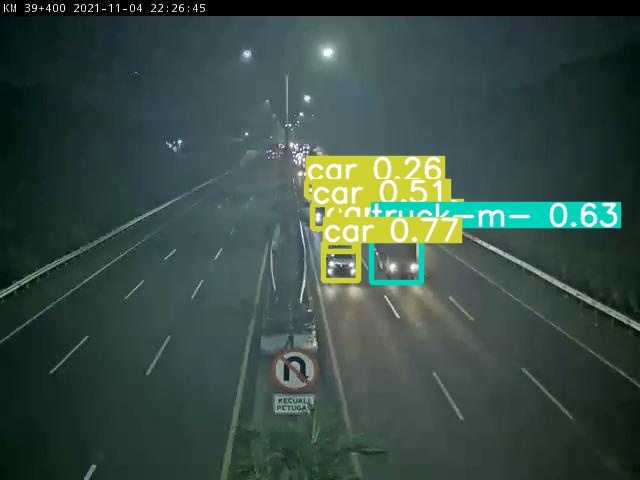

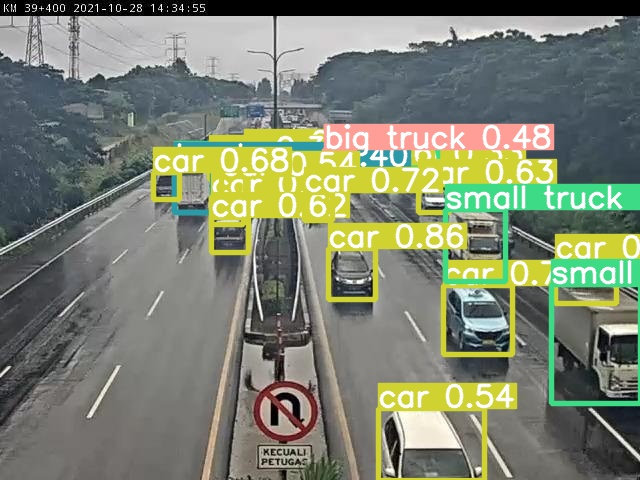

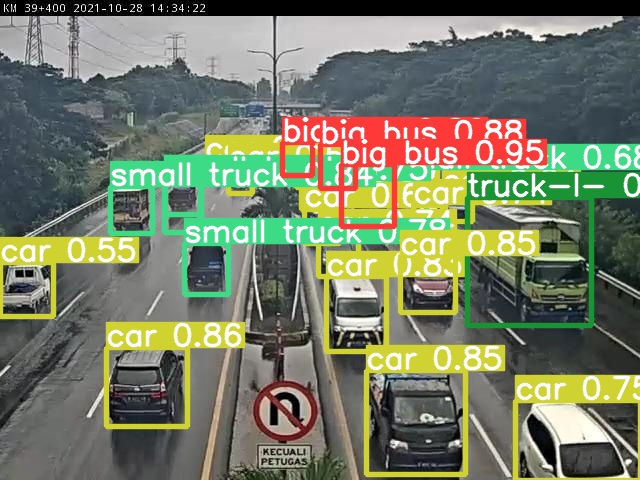

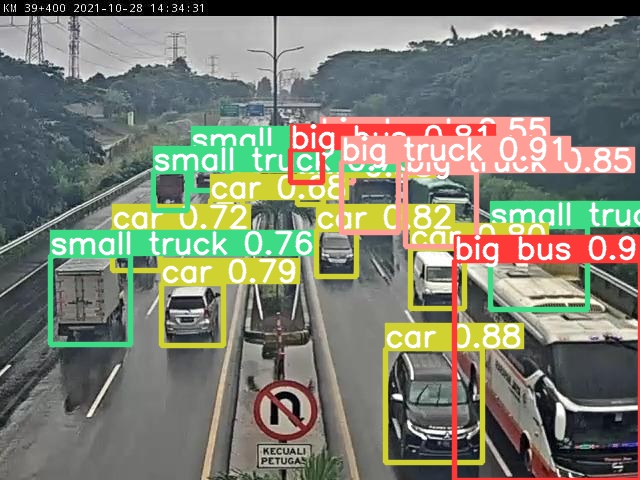

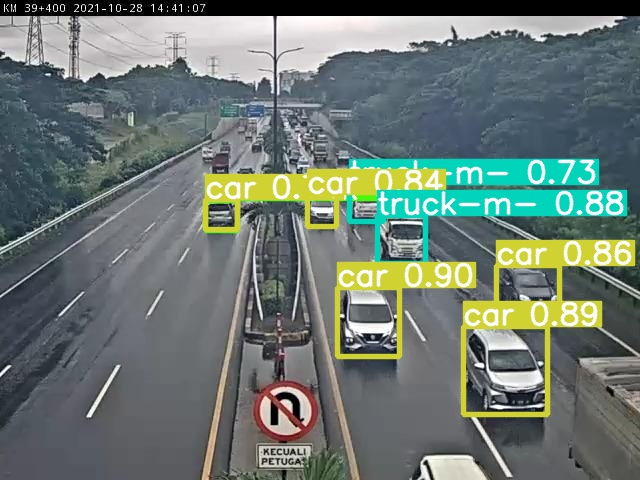

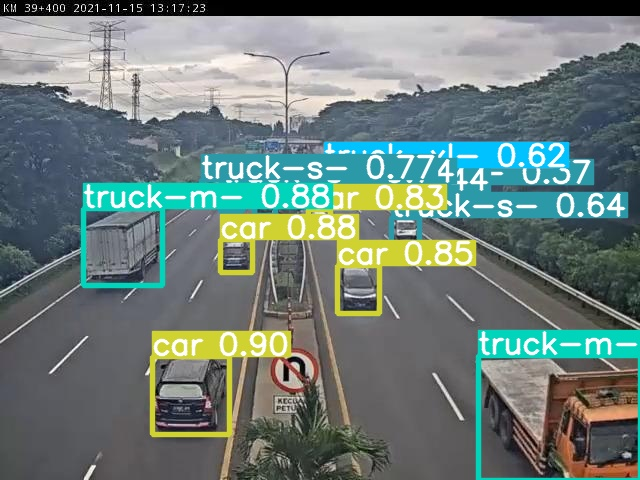

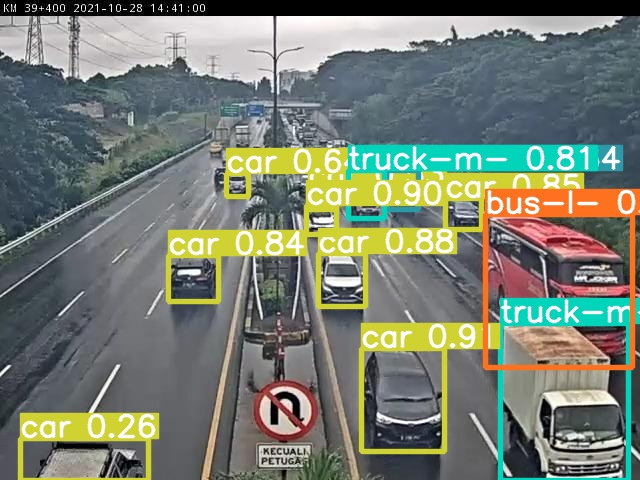

In [29]:
from glob import glob

for rasm_yulagi in glob("/content/runs/detect/predict2/*.jpg")[:10]:
  display(Image(filename = rasm_yulagi, width = 600))
  print("\n")